In [1]:
#importing required modules
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#importing the healthcare insurance data
df=pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#printing shape and column names
print("shape of data : ",df.shape)
print("columns names present in the data :",df.columns)

shape of data :  (1338, 7)
columns names present in the data : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [4]:
#checking data type of columns values and null values using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#rechecking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### GENERAL INFORMATION ABOUT THE DATA
**1.There are 1338 rows and 7 columns in the dataset.  
2.There are no missing values in our data set.  
3.There are 3 'object' type,2 'float' type and 2 'integer' type columns.  
4.all the categorical and numerical columns are appropriate type so no type conversion is required.**

### UNIVARIATE ANALYSIS ON ALL COLUMNS
#### NUMERICAL COLUMNS

##### ANALYSING THE AGE COLUMN

In [6]:
#creating a function for non_viz analysis
def nonviz(column):
    """This function prints the mininimum,maximum,mean,median and
    standard deviation"""
    print("The minimum value is : ",round(column.min(),2))
    print("The maximum value is : ",round(column.max(),2))
    print("The average value is : ",round(column.mean(),2))
    print("The median value is : ",round(column.median(),2))
    print("The standard deviation is : ",round(column.std(),2))

In [7]:
nonviz(df["age"])

The minimum value is :  18
The maximum value is :  64
The average value is :  39.21
The median value is :  39.0
The standard deviation is :  14.05


Text(0.5, 0, 'Age')

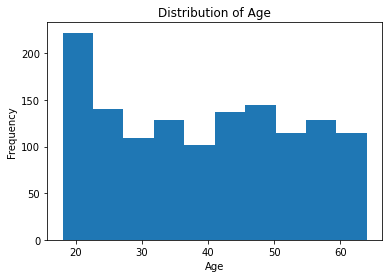

In [8]:
#creating distribution plot of age column
df["age"].plot.hist()
plt.title("Distribution of Age")
plt.xlabel("Age")


<AxesSubplot:>

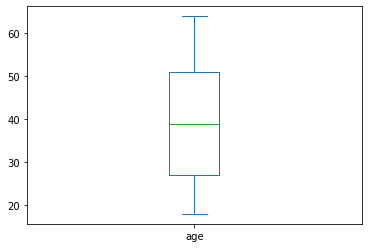

In [10]:
#finding outliers using box plot
df["age"].plot.box()

#### ` OBSERVATION`
 **1. There are no outliers present in the age column**  
 **2.Minimum and Maximum values are 18 and 64  respectively**  
 **3.The distribution of age is almost equal for the range of ages between 26 and 64 except for the people of age group between 18 to 25 are large in numbers compared to people of other ages.**

##### ANALYSING THE BMI COLUMN

In [11]:
df["bmi"].head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

In [12]:
# first we will round the value to two decimal points
df["bmi"]=df["bmi"].round(2)
df["bmi"].head()

0    27.90
1    33.77
2    33.00
3    22.70
4    28.88
Name: bmi, dtype: float64

In [13]:
#doing the non_viz analysis
nonviz(df["bmi"])

The minimum value is :  15.96
The maximum value is :  53.13
The average value is :  30.66
The median value is :  30.4
The standard deviation is :  6.1


<AxesSubplot:ylabel='Density'>

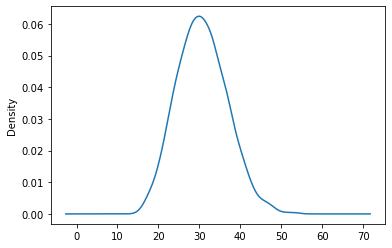

In [14]:
#creating distribution plot
df["bmi"].plot.kde()

<AxesSubplot:ylabel='Frequency'>

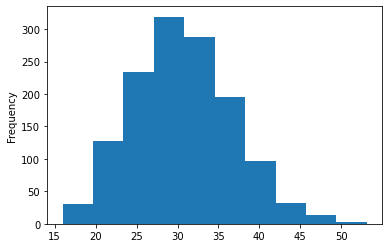

In [15]:
#creating distribution plot
df["bmi"].plot.hist()

Text(0, 0.5, 'bmi values')

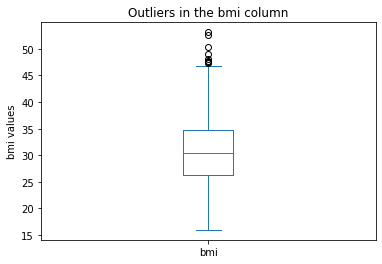

In [16]:
#finding outliers using boxplot
df["bmi"].plot.box()
plt.title("Outliers in the bmi column")
plt.ylabel("bmi values")

###### from the above plot we can see very few data points are above the upper boundary of whiskers , so we can calculate upper boundary using iqr method


In [3]:
#calculating upper boundary of bmi
bmi_q3=df['bmi'].quantile(0.75)
bmi_q1=df["bmi"].quantile(0.25)
bmi_iqr=bmi_q3-bmi_q1
bmi_upper=bmi_q3+1.5*bmi_iqr

#counting no of outliers
df[df["bmi"]>bmi_upper]["bmi"].count()

9

##### only 9 data points are outliers we can remove them for our data

In [4]:
#using filter operator to filter the data 
#we are preserving the data below 45 bmi

clean_df=df[~(df["bmi"]>bmi_upper)]

In [19]:
#checking shape of filtered data
clean_df.shape

(1329, 7)

<AxesSubplot:ylabel='Density'>

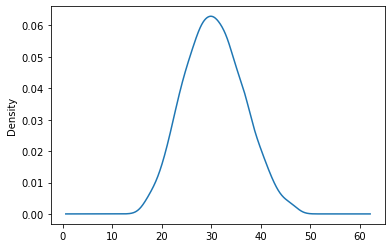

In [20]:
# checking the distribution plot again
clean_df["bmi"].plot.kde()

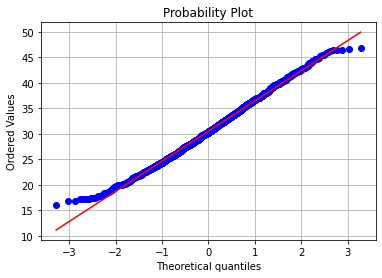

In [21]:
#this looks almost like normal distribution
#comparing with normal distribution using qq plot 
stats.probplot(clean_df["bmi"],dist="norm",plot=plt)
plt.grid()

In [22]:
#checking the empirical rule for this column 
bmi_std=clean_df["bmi"].std()
bmi_mean=clean_df["bmi"].mean()
#creating variables for different points.
one_std_right=bmi_mean+(1*bmi_std)
one_std_left=bmi_mean-(1*bmi_std)
two_std_right=bmi_mean+(2*bmi_std)
two_std_left=bmi_mean-(2*bmi_std)
three_std_right=bmi_mean+(3*bmi_std)
three_std_left=bmi_mean-(3*bmi_std)

In [23]:
#one standard deviation
clean_df[(clean_df["bmi"]<one_std_right)&(clean_df["bmi"]>one_std_left)].shape[0]/(clean_df.shape[0])

0.6576373212942062

In [24]:
#two standard deviation
clean_df[(clean_df["bmi"]<two_std_right)&(clean_df["bmi"]>two_std_left)].shape[0]/(clean_df.shape[0])

0.9578630549285176

In [25]:
#three standard deviation
clean_df[(clean_df["bmi"]<three_std_right)&(clean_df["bmi"]>three_std_left)].shape[0]/(clean_df.shape[0])

1.0

In [26]:
nonviz(clean_df["bmi"])

The minimum value is :  15.96
The maximum value is :  46.75
The average value is :  30.54
The median value is :  30.3
The standard deviation is :  5.92


#### ` OBSERVATION` 
**1.The average and median value of bmi is almost equal around 30.00  
  2.we removed 9 data points which were outliers above upper boundary of bmi 
  3.After removing outliers the standard deviation is reduced from 6.097 to 5.919  
  4.The distribution of bmi follows normal distribution
  5.It follows the empirical rule i.e (68%,95%,99.7%).
  Here we can see that  
  -more than 65% of data fall within one standard deviation.  
  -more than 95% of data falls within two standard deviation.  
  -100% of data falls within three standard deviation**
    

##### ANALYSING THE CHILDREN COLUMN

In [27]:
"""checking the unique values since children column is number of children 
   a person is having"""
    
df["children"].unique() 

array([0, 1, 3, 2, 5, 4], dtype=int64)

<AxesSubplot:>

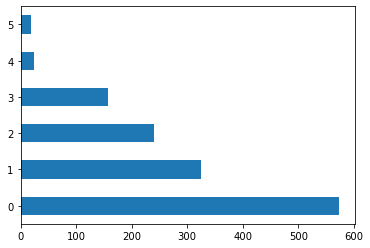

In [28]:
## counting the frequency of number of children
df["children"].value_counts().plot.barh()

#### ` OBSERVATION`
**1.Most of the persons are having no children at all and they are greater than 550.  
2.100 to 300 persons are having 1,2,3 number of children.  
3.Very few people are having 4 or 5 number of children.**

### ANALYSING THE CHARGES COLUMN 

In [29]:
## checking charges column
df["charges"].head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [30]:
#rounding the charges column to two decimal places 
df["charges"]=df["charges"].round(2)
df["charges"].head() 

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64

In [31]:
# doing non visual statistics 
nonviz(df["charges"])

The minimum value is :  1121.87
The maximum value is :  63770.43
The average value is :  13270.42
The median value is :  9382.03
The standard deviation is :  12110.01


<AxesSubplot:ylabel='Frequency'>

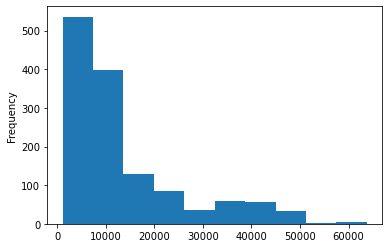

In [37]:
#creating distribution plot
df["charges"].plot.hist() 

<AxesSubplot:ylabel='Density'>

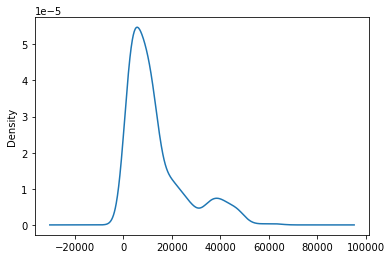

In [32]:
#creating distribution plot
df["charges"].plot.kde()

<AxesSubplot:>

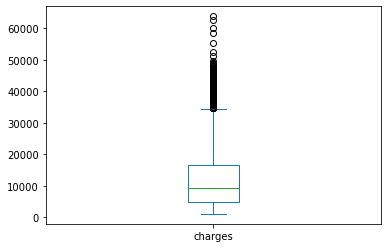

In [33]:
#finding outliers using boxplot
df["charges"].plot.box()

In [7]:
print(df[df["charges"]<1122])
print(df[df["charges"]>63000])

     age   sex    bmi  children smoker     region    charges
940   18  male  23.21         0     no  southeast  1121.8739
     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801


#### `OBSERVATION`
**1.The charges column distribution is right skewed which means that many outliers are in the high end side.  
2.around 400 to 500 people have charges between 10000 to 15000.  
3.The average value  of charges is 13270.42.   
4.The maximum value is 63770.43 and it belongs to a 54 years old female having bmi of 47.41 with 0 number of children who smokes and is from south east region.  
5.The minimum value of charges is 1121.87 of a 18 years old male having bmi of 23.21 who does not smoke and is from southeast region.**

##### ANALYSING THE  OUTLIERS IN CHARGES COLUMN

In [9]:
## calculating the upper boundary of whisker using iqr method
charges_iqr=df["charges"].quantile(0.75)-df["charges"].quantile(0.25)
charges_upper_boundary=df["charges"].quantile(0.75)+(1.5*charges_iqr)

#counting the no of data points above upper boundary
df[df["charges"]>charges_upper_boundary]["charges"].count()

139

<AxesSubplot:>

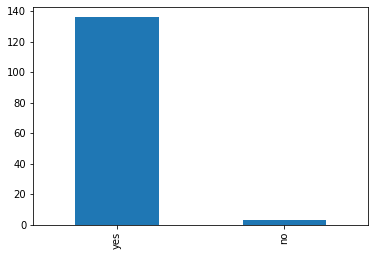

In [35]:
#analysing the charges outlier column
df[df["charges"]>charges_upper_boundary]["smoker"].value_counts().plot.bar()

<AxesSubplot:>

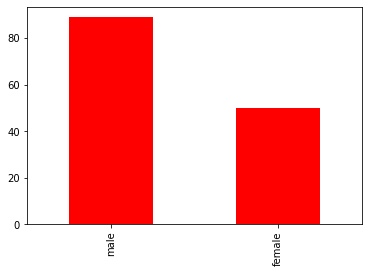

In [43]:
df[df["charges"]>charges_upper_boundary]["sex"].value_counts().plot.bar(color="red")

<AxesSubplot:ylabel='Frequency'>

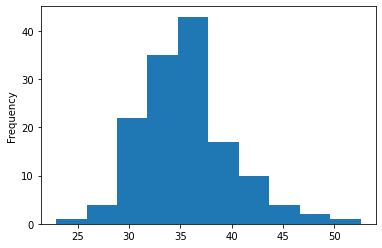

In [11]:
df[df["charges"]>charges_upper_boundary]["bmi"].plot.hist()

In [10]:
df[df["charges"]>charges_upper_boundary]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


#### `OBSERVATION` 
**1.In the charges outliers out of 139 more than 120 are smokers.  
2.Out of 139 more than 90 are males.  
3.Bmi of most of them are in the range of 35 to 40.**

#### ANALYSIS THE SEX COLUMN

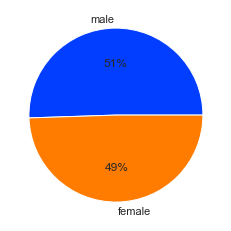

In [59]:
colors=sns.color_palette("bright")
plt.pie(df["sex"].value_counts(), labels =df["sex"].value_counts().index,colors=colors,autopct='%.0f%%')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

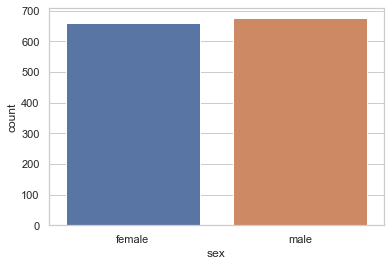

In [65]:
#plotting barplot for the sex column
sns.countplot(df["sex"])

####  `OBSERVATION` 
**1.The sex column is almost equally distributed between male  and female  
  2.Males are 51% and females are 49% in the dataset.**

#### ANALYSING THE SMOKER COLUMN

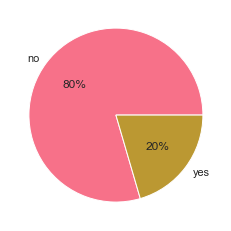

In [67]:
colors=sns.color_palette("husl")
plt.pie(df["smoker"].value_counts(), labels =df["smoker"].value_counts().index,colors=colors,autopct='%.0f%%')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

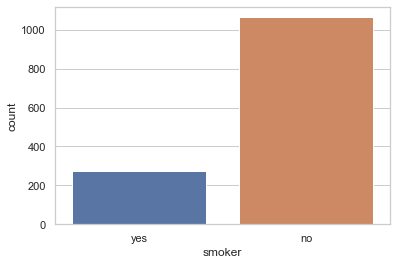

In [70]:
#plotting bar plot 
sns.countplot(df["smoker"])

#### `OBSERVATION`
**1.The smoker column has uneven distribution among the smokers and non smokers   2.80% of the people are smokers and 20% are non smokers**

#### ANALYSING THE REGION COLUMN

<AxesSubplot:xlabel='region', ylabel='count'>

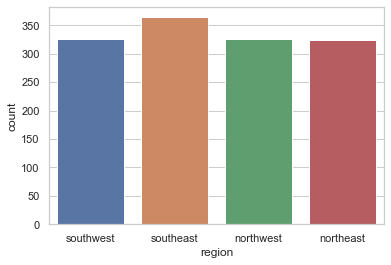

In [71]:
# COUNT PLOT REGION COLUMN 
sns.countplot(data=df,x="region")

#### `OBSERVATION`
**1.The count of people from southwest,northwest,northwest are almost equal in number approximately around 325.  
 2.While more than 350 people are from southest region**

### BIVARIATE ANALYSIS

#### SMOKER VS CHARGES 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

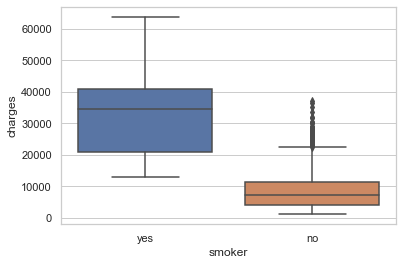

In [72]:
sns.boxplot(x="smoker",y="charges",data=df)

#### SEX VS CHARGES

<AxesSubplot:xlabel='sex', ylabel='charges'>

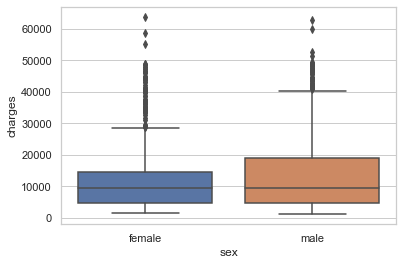

In [73]:
sns.boxplot(x="sex",y="charges",data=df)

#### `OBSERVATION`
**1.The median value is the same for both male and female but the charges distribution is more on the higher side in the male.**

#### REGION VS CHARGES

<AxesSubplot:xlabel='region', ylabel='charges'>

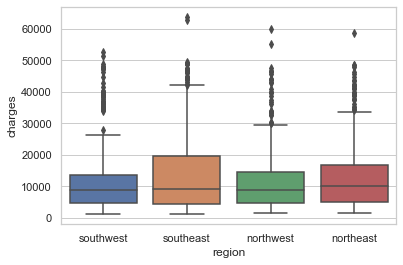

In [74]:
sns.boxplot(x="region",y="charges",data=df)

#### `OBSERVATION` 
**1.The south east region has higher charges distribution.**

#### CHILDREN VS CHARGES


<AxesSubplot:xlabel='children', ylabel='charges'>

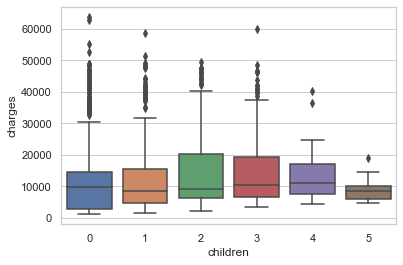

In [76]:
sns.boxplot(x="children",y="charges",data=df)

#### `OBSERVATION`
**1.People having less than 4 children have higher ranges ofcharges.**

#### bmi vs sex

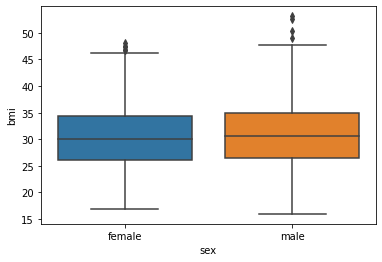

In [6]:
sns.boxplot(x="sex",y="bmi",data=df)
plt.show()

#### `OBSERVATION` 
**The bmi distribution is equal for both male and female**

### MULTIVARIATE ANALYSIS 

####  CHARGES VS AGE ON THE BASIS OF SMOKER AND BMI


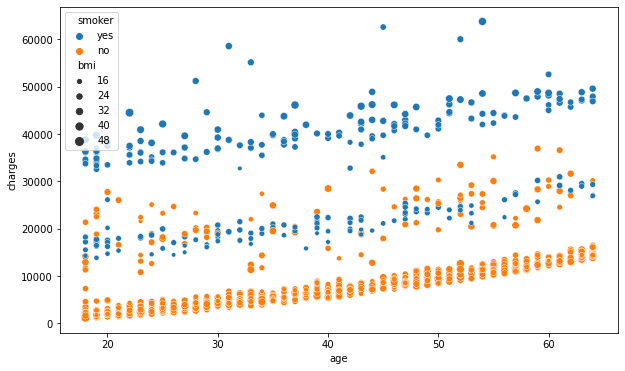

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="age",y="charges",hue="smoker",data=df,size="bmi")
plt.show()


#### `OBSERVATION`
**1.Higher and lower charges are present for all the ages.when we look at smokers charges they are comparatively higher than non smokers charges.  
2.If we look at the bmi of the smokers with highest charges their bmi is highest also**

#### CHARGES VS BMI  ON THE BASIS OF SEX AND REGION

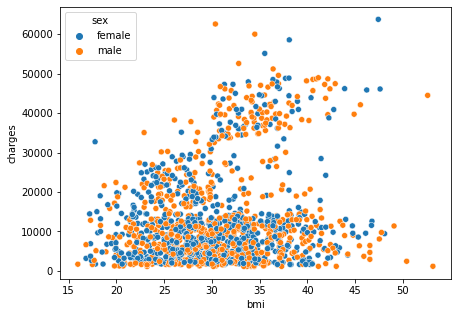

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="bmi",y="charges",hue="sex",data=df)
plt.show()

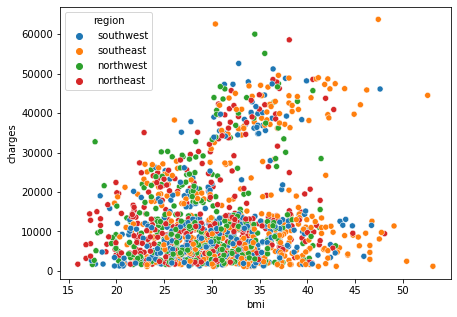

In [4]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="bmi",y="charges",hue="region",data=df)
plt.show()

#### `OBSERVATION` 
**1.The sex and region column does not affect the charges much .  
2.The smoker column greatly affects the charges.**

#### ANALYSIS RELATIONSHIP BETWEEN VARIOUS NUMERICAL COLUMN ON THE BASIS OF SMOKER COLUMN. 

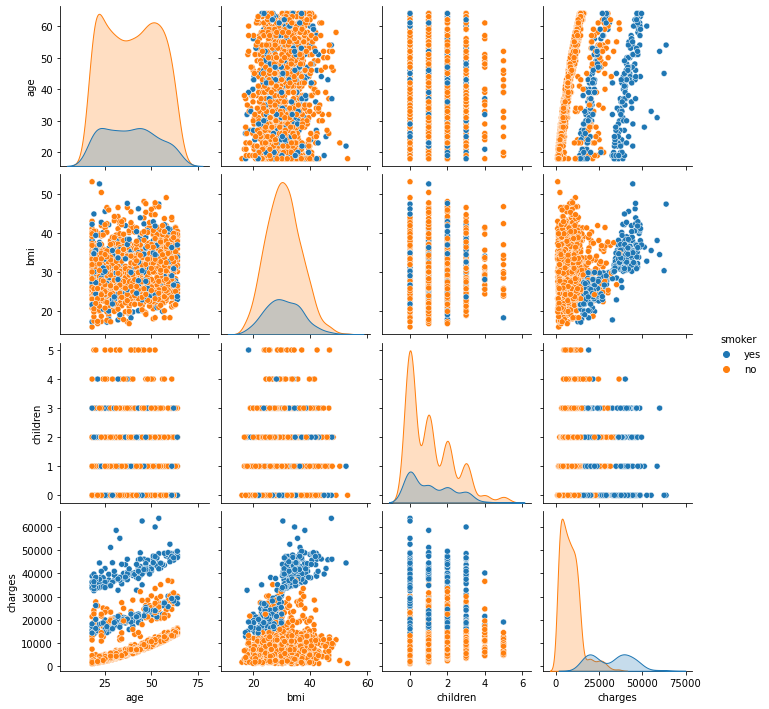

In [9]:
sns.pairplot(df,hue="smoker") 

#### `OBSERVATION`
**1.For age and charges column we see the chaarges covers almost the whole age except that for smokers charges are higher as compared to non smokers.  
2.Same observation goes for the bmi vs charges column also.We see that bmi an be same for the smoker and non smokers except that the charges are higher for smokers.  
3.If we draw a best fit line for bmi vs charges column the slope of smokers is going to be higher than the slope of non smokers.That is  
-the increase in charges vs bmi is greater for smokers than vs non smokers.**

#### HEATMAP (ACCORDING TO PEARSON CORRELATION COEFFICIENT)

<AxesSubplot:>

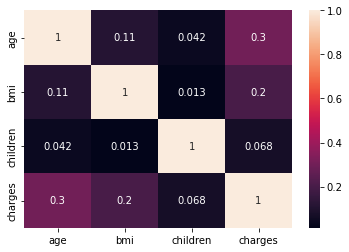

In [14]:
sns.heatmap(df.corr(),annot=True) 

#### `OBSERVATION`
**1.There is almost no relation between age children column ,children and bmi column and children and charges column.  
2.There is weak positive relation between charges and age,charges and bmi and bmi and age column.** 


#### `RECOMMENDATIONS` 
- The company should watch out for the smokers as they are having high charges as compared to the non smokers.  
- The company should also take in consideration at persons bmi as people with bmi higher than normal range are most likely to have higher charges. 
- The age of person should also be considered as a factor influencing bmi.Higher the age of the person higher is the bmi going to be which will make the charges higher